In [30]:
import numpy as np
import pandas as pd

In [31]:
data = pd.read_csv('iris.csv')
#data.head(8)
data.sample(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
28,5.2,3.4,1.4,0.2,Setosa
108,6.7,2.5,5.8,1.8,Virginica
30,4.8,3.1,1.6,0.2,Setosa


In [45]:
from sklearn import datasets
data = datasets.load_iris()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


AttributeError: ignored

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb


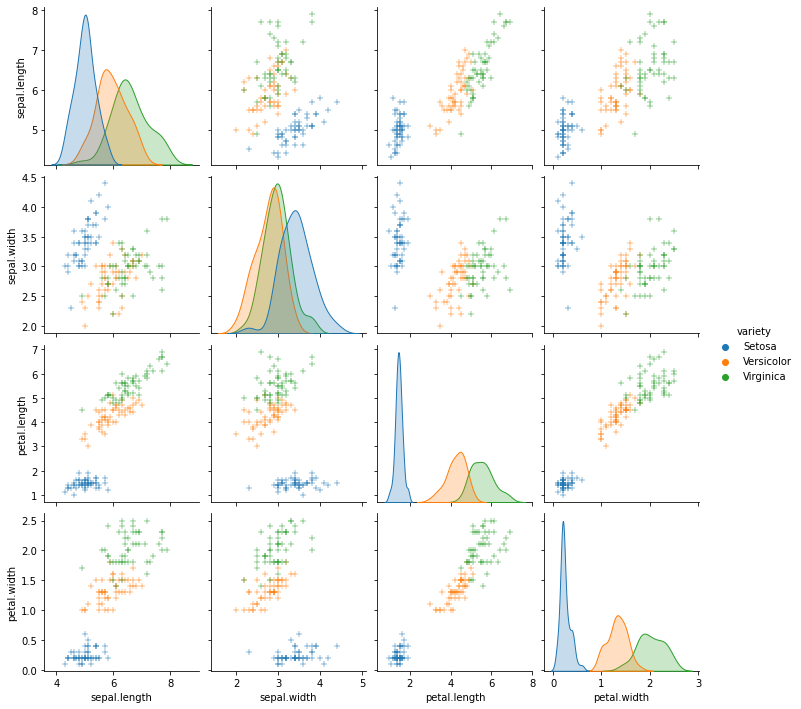

In [36]:
g = sb.pairplot(data, hue='variety', markers='+')
plt.show()

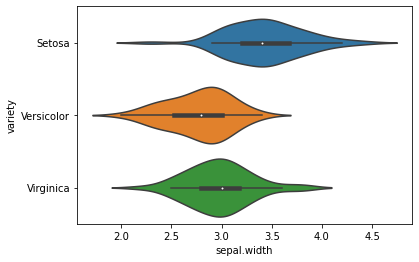

In [37]:
g = sb.violinplot(y='variety', x='sepal.width', data=data, inner='box')
plt.show()

In [50]:
y = data['target']
X = data.data[: , :4]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [39]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
X_test.shape

(60, 4)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn import metrics

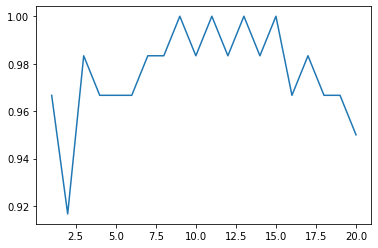

In [52]:
k_range = list(range(1,21))
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [55]:
metrics.r2_score(y_test, y_pred)

1.0

In [58]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_test = s.fit_transform(X_test)
X_train = s.fit_transform(X_train)
X_test.mean()

1.1102230246251566e-17

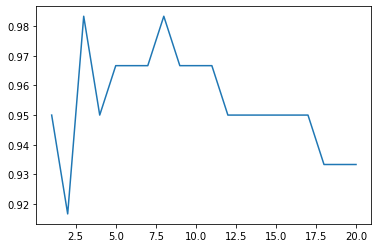

In [59]:
k_range = list(range(1,21))
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [64]:
scores

[0.95,
 0.9166666666666666,
 0.9833333333333333,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [65]:
metrics.confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 20,  1],
       [ 0,  2, 17]])

In [66]:
metrics.mean_squared_error(y_test, y_pred)

0.05